In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

## 数据载入与检查

In [219]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [8]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [11]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [220]:
movies_credits = movies.merge(credits, left_on='id', right_on='movie_id', how='left') #将两个数据集合并
movies_credits.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [221]:
import json

In [223]:
json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'cast', 'crew']
for column in json_columns:
    movies_credits[column] = movies_credits[column].apply(json.loads)

TypeError: the JSON object must be str, bytes or bytearray, not list

In [225]:
movies_credits

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."
5,258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{'id': 851, 'name': 'dual identity'}, {'id': ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
6,260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,Tangled,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de..

In [26]:
def extractName(column):
    col = [[di['name'] for di in row] for row in column]
    return col

In [27]:
ex_name = ['genres', 'production_companies', 'production_countries']
for column in ex_name:
    movies_credits[column] = extractName(movies_credits[column])
movies_credits['actors'] = [[di['name'] for di in row[0:4]] for row in movies_credits['cast']]    #演员只取前4位
movies_credits['keywords'] = [[di['name'] for di in row[0:10]] for row in movies_credits['keywords']]    #关键词只取前10个

In [29]:
movies_credits['genres']

0        [Action, Adventure, Fantasy, Science Fiction]
1                         [Adventure, Fantasy, Action]
2                           [Action, Adventure, Crime]
3                     [Action, Crime, Drama, Thriller]
4                 [Action, Adventure, Science Fiction]
5                         [Fantasy, Action, Adventure]
6                                  [Animation, Family]
7                 [Action, Adventure, Science Fiction]
8                         [Adventure, Fantasy, Family]
9                         [Action, Adventure, Fantasy]
10       [Adventure, Fantasy, Action, Science Fiction]
11                [Adventure, Action, Thriller, Crime]
12                        [Adventure, Fantasy, Action]
13                        [Action, Adventure, Western]
14       [Action, Adventure, Fantasy, Science Fiction]
15                        [Adventure, Family, Fantasy]
16                [Science Fiction, Action, Adventure]
17                        [Adventure, Action, Fantasy]
18        

In [31]:
#提取crew中的导演、编剧、制片人信息
def extractDirector(crew, job):
    name = ''
    for di in crew:
        if di['job'] == job:
            name = di['name']
            break 
        else:
            pass
    return name
movies_credits['director'] = [extractDirector(crew, 'Director') for crew in movies_credits.crew]
movies_credits['writer'] = [extractDirector(crew, 'Writer') for crew in movies_credits.crew]
movies_credits['producer'] = [extractDirector(crew, 'producer') for crew in movies_credits.crew]

In [32]:
#提取release_date（2009-12-10）一列中的年份，方便后续按年份来统计：
movies_credits['year'] = pd.to_datetime(movies_credits['release_date']).apply(lambda x: x.year)

In [227]:
#dropna
movies = movies_credits[['title_x', 'genres', 'keywords', 'director', 'actors', 'writer', 'producer', 'budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'production_companies', 'production_countries', 'year']].dropna()
movies.rename(columns={'title_x': 'title'}, inplace = True)
movies.year = movies.year.astype(int)
movies.describe()

KeyError: "['director' 'actors' 'writer' 'producer' 'year'] not in index"

In [226]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

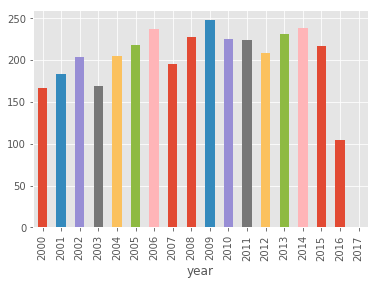

In [38]:
#截取2000年之后的数据用于研究：
movies[movies['year'] >= 2000].groupby('year').size().plot(kind = 'bar')

In [228]:
#取2000-2015年间的数据
movies = movies[(movies.year >= 2000) & (movies.year < 2016) & (movies.vote_count > 40) &(movies.budget * movies.revenue * movies.popularity * movies.vote_average !=0)].reset_index(drop = 'True')

AttributeError: 'DataFrame' object has no attribute 'year'

## 票房及评分分析

In [40]:
#票房top10
movies_15.sort_values('revenue', ascending=False)[['title', 'revenue', 'budget', 'genres']][0:10]

,title,revenue,budget,genres
0,Avatar,2787965087,237000000,"[Action, Adventure, Fantasy, Science Fiction]"
15,The Avengers,1519557910,220000000,"[Science Fiction, Action, Adventure]"
25,Jurassic World,1513528810,150000000,"[Action, Adventure, Science Fiction, Thriller]"
41,Furious 7,1506249360,190000000,[Action]
7,Avengers: Age of Ultron,1405403694,280000000,"[Action, Adventure, Science Fiction]"
109,Frozen,1274219009,150000000,"[Animation, Adventure, Family]"
28,Iron Man 3,1215439994,200000000,"[Action, Adventure, Science Fiction]"
440,Minions,1156730962,74000000,"[Family, Animation, Adventure, Comedy]"
49,Transformers: Dark of the Moon,1123746996,195000000,"[Action, Science Fiction, Adventure]"
281,The Lord of the Rings: The Return of the King,1118888979,94000000,"[Adventure, Fantasy, Action]"


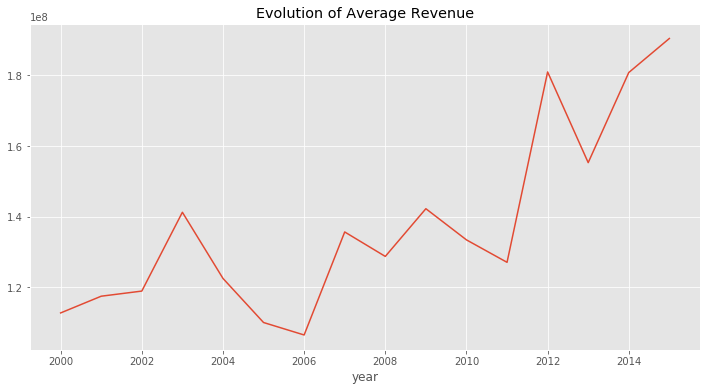

In [150]:
#票房总体变化趋势
revenue_by_year = movies_15.groupby('year').revenue.mean()
revenue_by_year.plot(title='Evolution of Average Revenue', figsize=(12,6))

In [43]:
#评分top10
movies_15.sort_values('vote_average', ascending=False)[['title', 'vote_average', 'genres']][0:10]

,title,vote_average,genres
1980,Whiplash,8.3,[Drama]
1457,Spirited Away,8.3,"[Fantasy, Adventure, Animation, Family]"
59,The Dark Knight,8.2,"[Drama, Action, Crime, Thriller]"
1303,Howl's Moving Castle,8.2,"[Fantasy, Animation, Adventure]"
1981,City of God,8.1,"[Drama, Crime]"
83,Interstellar,8.1,"[Adventure, Drama, Science Fiction]"
84,Inception,8.1,"[Action, Thriller, Science Fiction, Mystery, A..."
1662,Room,8.1,"[Drama, Thriller]"
281,The Lord of the Rings: The Return of the King,8.1,"[Adventure, Fantasy, Action]"
1914,Memento,8.1,"[Mystery, Thriller]"


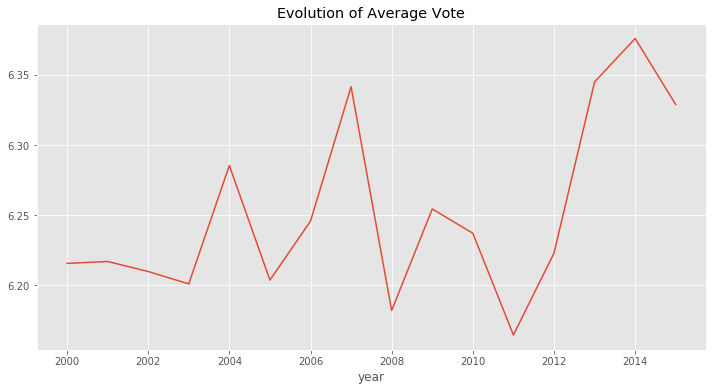

In [151]:
#评分总体变化趋势
vote_by_year = movies_15.groupby('year').vote_average.mean()
vote_by_year.plot(title='Evolution of Average Vote', figsize=(12,6))

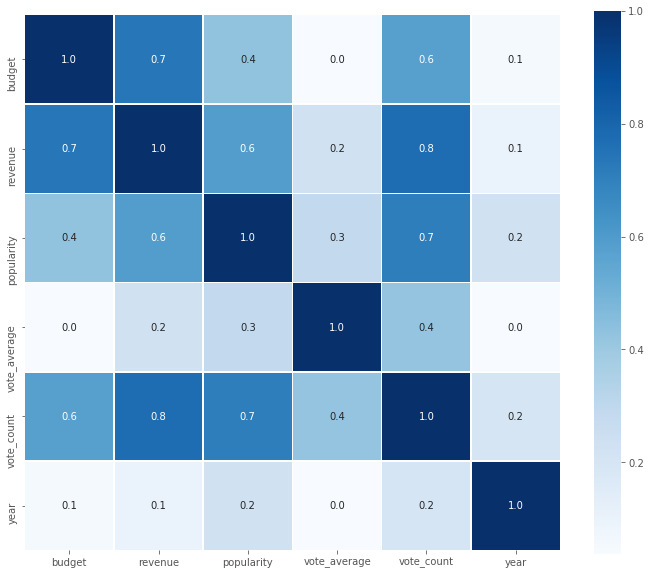

In [253]:
#票房和评分的影响因素
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(movies_15.corr(), annot=True, vmax=1, square=True, cmap='Blues', linewidths=.5, fmt= '.1f', ax=ax)

### 影片类型的影响

In [48]:
def countN(column):
    count = dict()
    for row in column:
        for ele in row:
            if ele in count:
                count[ele] += 1
            else:
                count[ele] = 1
    return count

In [256]:
genres = pd.Series(countN(movies_15.genres)).sort_values()

TypeError: 'float' object is not iterable

In [ ]:
genres[8:].plot.barh(width=0.9,color=sns.color_palette('icefire',10), figsize=(12,10), title='Top Genres').patches[9].set_facecolor('r')

In [257]:
#不同类型影片的平均票房
sns.set_style("whitegrid")
movies_by_genres = pd.DataFrame(0, index = genres.index, columns=['revenue', 'vote'])
for i in range(len(movies_15)):
    for g in movies_15.genres[i]:
        movies_by_genres.loc[g, 'revenue'] += movies_15.revenue[i] # 该类影片的总票房
        movies_by_genres.loc[g, 'vote'] += movies_15.vote_average[i]  #该类型影片的总评分
movies_by_genres = movies_by_genres.div(genres.values, axis=0)
movies_by_genres.sort_values('revenue', ascending=False)['revenue'].plot(kind='bar', width=0.6, figsize=(12,6), title='Average Revenue in Different Genres')

KeyError: 'the label [[] is not in the [index]'

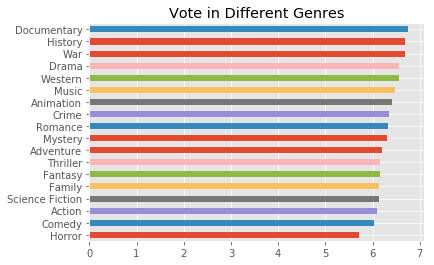

In [97]:
#不同类型影片的平均评分
movies_by_genres.sort_values('vote')['vote'].plot(kind='barh', title = 'Vote in Different Genres')

{'whiskers': [<matplotlib.lines.Line2D at 0x12541aa20>,
 'caps': [<matplotlib.lines.Line2D at 0x125405400>,
 'boxes': [<matplotlib.patches.PathPatch at 0x12541a7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x125405cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12537d5f8>],
 'means': [<matplotlib.lines.Line2D at 0x125405dd8>]}

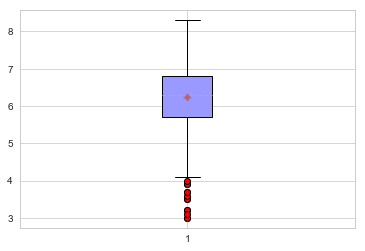

In [258]:
#movies_by_genres = pd.DataFrame(0, index = genres.index, columns=['revenue', 'vote'])
plt.boxplot(x=movies_15.vote_average
        ,patch_artist=True#要求用自定义颜色填充盒型图，默认白色填充
        ,showmeans=True#以点的形式显示均值
        ,boxprops={'color':'black','facecolor':'#9999ff'}#设置箱体属性，填充色和边框色
        ,flierprops={'marker':'o','markerfacecolor':'red','color':'black'}#设置异常值属性，点的形状、填充颜色和边框色
        ,meanprops={'marker':'D','markerfacecolor':'indianred'}#设置均值点的属性，点的颜色和形状
        ,medianprops={"linestyle":'--','color':'orange'}#设置中位数线的属性，线的类型和颜色
)

### 导演的影响

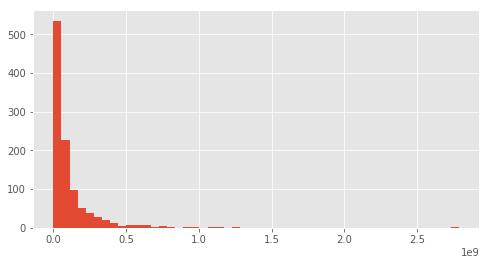

In [153]:
#导演的票房分布
revenue_of_director = movies_15.groupby('director').revenue.mean()  #平均票房
revenue_of_director.hist(bins=50, figsize=(8,4))

In [260]:
revenue_of_director

director
Adam McKay                     1.431794e+08
Adam Shankman                  1.091953e+08
Adrian Lyne                    1.191378e+08
Adrienne Shelly                2.217943e+07
Agnieszka Wojtowicz-Vosloo     3.606395e+06
Agustín Díaz Yanes             2.332195e+07
Akiva Goldsman                 3.080023e+07
Akiva Schaffer                 6.826786e+07
Alan Parker                    3.895560e+07
Alan Poul                      7.747701e+07
Alan Taylor                    5.425875e+08
Albert Hughes                  1.158329e+08
Alejandro Agresti              1.148301e+08
Alejandro Amenábar             3.878836e+07
Alejandro González Iñárritu    1.705664e+08
Alejandro Monteverde           6.420319e+06
Aleksey German                 1.310673e+06
Alex Garland                   3.686941e+07
Alex Gibney                    2.746610e+05
Alex Kendrick                  2.605229e+07
Alex Proyas                    2.513406e+08
Alexander Payne                1.025587e+08
Alexander Witt         

Text(0.5,1,'Directors with highest revenue')

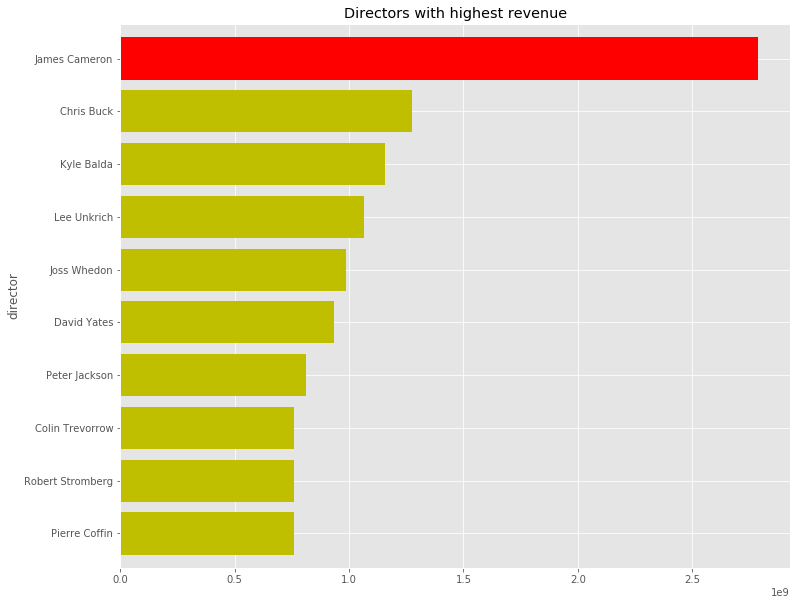

In [136]:
#票房top10导演
revenue_of_director.sort_values().tail(10).plot(kind='barh', figsize=(12,10), width=0.8, color='y').patches[9].set_facecolor('r')
plt.title('Directors with highest revenue')

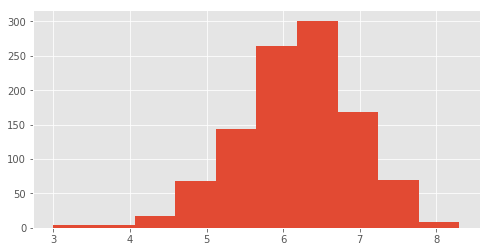

In [129]:
#导演的评分分布
vote_of_director = movies_15.groupby('director').vote_average.mean()   #平均评分
vote_of_director.hist(figsize=(8,4))

Text(0.5,1,'Directors with Top Vote')

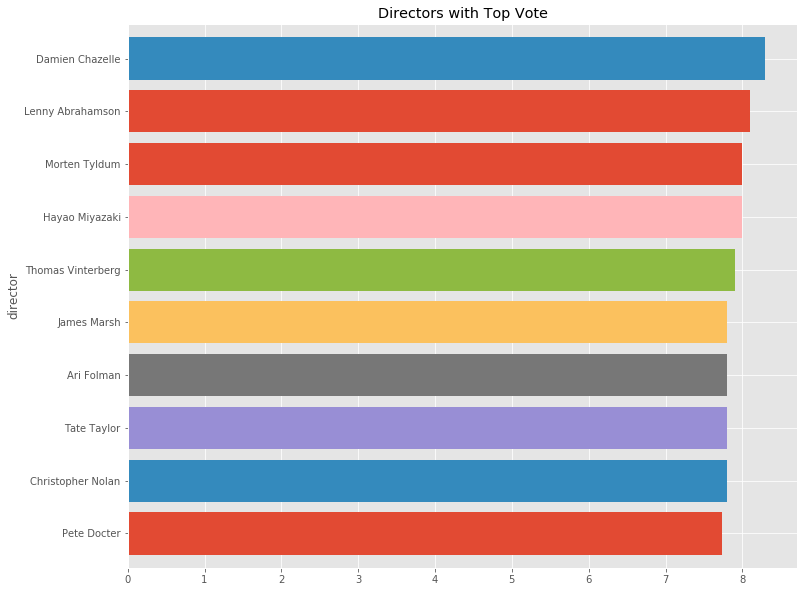

In [137]:
#评分top10导演
vote_of_director.sort_values().tail(10).plot(kind='barh',figsize=(12,10), width=0.8)
plt.title('Directors with Top Vote')

### 主演的影响

In [172]:
#主演的票房分布
movies_noani = movies_15[~movies_15.genres.str.contains('Animation', regex=False)].reset_index(drop='True')

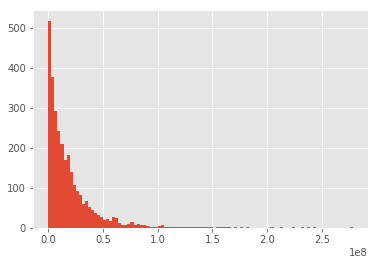

In [145]:
#我们只考虑前4位主演，每位主演对票房的贡献按下面的列表来计算：
actors = pd.Series(countN(movies_noani.actors)).sort_values()
movies_by_actors = pd.DataFrame(0, index= actors.index, columns=['revenue', 'vote'])
#按不同权重统计演员的票房：
r4 = [0.4, 0.3, 0.2, 0.1]  #如果有4位主演，按此加权，以下类似
r3 = [0.4, 0.3, 0.3]
r2 = [0.6, 0.4]
r1 = [1]
r = [r1, r2, r3, r4]
for i in range(len(movies_noani)):
    actorlist = movies_noani.actors[i][0:4]
    for j in range(len(actorlist)):
        movies_by_actors.loc[actorlist[j], 'revenue'] += movies_noani.revenue[i] * r[len(actorlist)-1][j] #一个演员的总票房
        movies_by_actors.loc[actorlist[j], 'vote'] += movies_noani.vote_average[i]  # 一个演员的总评分
movies_by_actors = movies_by_actors.div(actors.values, axis=0)  #求出平均值

movies_by_actors.revenue.hist(bins=100)

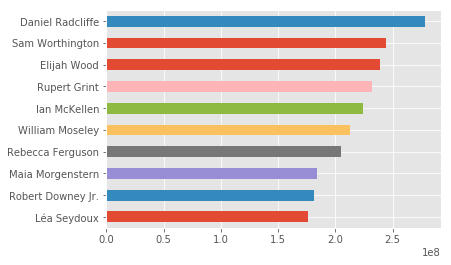

In [146]:
# 票房最高主演
movies_by_actors.revenue.sort_values().tail(10).plot(kind='barh')

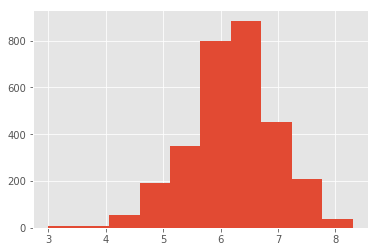

In [147]:
#演员的评分分布
movies_by_actors.vote.hist()

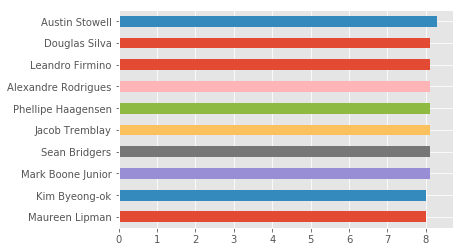

In [148]:
#评分最高演员
movies_by_actors.vote.sort_values().tail(10).plot(kind = 'barh')

### 预测

In [217]:
movies

,title,genres,keywords,director,actors,writer,producer,budget,revenue,popularity,vote_average,vote_count,production_companies,production_countries,year
0,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","[culture clash, future, space war, space colon...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,,237000000,2787965087,150.437577,7.2,11800,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009
1,Pirates of the Caribbean: At World's End,"['Action', 'Adventure', 'Fantasy']","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",,,300000000,961000000,139.082615,6.9,4500,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007
2,Spectre,"['Action', 'Adventure', 'Crime']","[spy, based on novel, secret agent, sequel, mi...",Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",,,245000000,880674609,107.376788,6.3,4466,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015
3,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']","[dc comics, crime fighter, terrorist, secret i...",Christopher Nolan,"[Christian Bale, Michael Caine, Gary Oldman, A...",,,250000000,1084939099,112.312950,7.6,9106,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012
4,John Carter,"['Action', 'Adventure', 'Science Fiction']","[based on novel, mars, medallion, space travel...",Andrew Stanton,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",,,260000000,284139100,43.926995,6.1,2124,[Walt Disney Pictures],[United States of America],2012
5,Spider-Man 3,"['Action', 'Adventure', 'Fantasy']","[dual identity, amnesia, sandstorm, love of on...",Sam Raimi,"[Tobey Maguire, Kirsten Dunst, James Franco, T...",,,258000000,890871626,115.699814,5.9,3576,"[Columbia Pictures, Laura Ziskin Productions, ...",[United States of America],2007
6,Tangled,"['Animation', 'Family']","[hostage, magic, horse, fairy tale, musical, p...",Byron Howard,"[Zachary Levi, Mandy Moore, Donna Murphy, Ron ...",,,260000000,591794936,48.681969,7.4,3330,"[Walt Disney Pictures, Walt Disney Animation S...",[United States of America],2010
7,Avengers: Age of Ultron,"['Action', 'Adventure', 'Science Fiction']","[marvel comic, sequel, superhero, based on com...",Joss Whedon,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,,280000000,1405403694,134.279229,7.3,6767,"[Marvel Studios, Prime Focus, Revolution Sun S...",[United States of America],2015
8,Harry Potter and the Half-Blood Prince,"['Adventure', 'Family', 'Fantasy']","[witch, magic, broom, school of witchcraft, wi...",David Yates,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",,,250000000,933959197,98.885637,7.4,5293,"[Warner Bros., Heyday Films]","[United Kingdom, United States of America]",2009
9,Batman v Superman: Dawn of Justice,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","[dc comics, vigilante, superhero, based on com...",Zack Snyder,"[Ben Affleck, Henry Cavill, Gal Gadot, Amy Adams]",,,250000000,873260194,155.790452,5.7,7004,"[DC Comics, Atlas Entertainment, Warner Bros.,...",[United States of America],2016


In [215]:
movies_15['genres']=movies_15['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_15['genres']=movies_15['genres'].str.split(',')

In [216]:
for i,j in zip(movies_15['genres'],movies_15.index):
    list2=[]
    list2=i
    list2.sort()
    movies_15.loc[j,'genres']=str(list2)
movies_15['genres']=movies_15['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_15['genres']=movies_15['genres'].str.split(',')

AttributeError: 'float' object has no attribute 'sort'

In [208]:
for i,j in zip(movies_15['genres'],movies_15.index):
    list

In [170]:
y = movies_15['director']
y

0              James Cameron
1             Gore Verbinski
2                 Sam Mendes
3          Christopher Nolan
4             Andrew Stanton
5                  Sam Raimi
6               Byron Howard
7                Joss Whedon
8                David Yates
9               Bryan Singer
10              Marc Forster
11            Gore Verbinski
12            Gore Verbinski
13               Zack Snyder
14            Andrew Adamson
15               Joss Whedon
16              Rob Marshall
17          Barry Sonnenfeld
18             Peter Jackson
19                 Marc Webb
20              Ridley Scott
21             Peter Jackson
22               Chris Weitz
23             Peter Jackson
24                Peter Berg
25           Colin Trevorrow
26                Sam Mendes
27                 Sam Raimi
28               Shane Black
29                Tim Burton
                ...         
2065              C. Jay Cox
2066            Jamie Travis
2067           Tommy Wirkola
2068         C

In [163]:
#评分与类型、导演、主演有关
y = movies_15['vote_average']
X = movies_15[['director']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lm = LinearRegression()

In [164]:
lm.fit(X_train,y_train)

ValueError: setting an array element with a sequence.